In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('resultantDataset.csv')
df.head()

,age,gender,ap_hi,ap_lo,ap,active,bmi_level,cardio,height,weight,...,gluc,smoke,alco,sleep_duration,quality_sleep,p_active_level,stress_level,heart_rate,steps,occupation
0,40.0,2.0,126.0,81.0,44.0,0.0,2.0,1.0,180.0,94.0,...,1.0,0.0,1.0,10.0,8.0,1.0,8.0,95.0,7000.0,Software Engineer
1,44.0,2.0,139.0,76.0,63.0,1.0,2.0,1.0,179.0,87.0,...,1.0,1.0,1.0,8.0,7.0,1.0,6.0,66.0,9000.0,Accountant
2,35.0,2.0,122.0,69.0,52.0,0.0,3.0,1.0,176.0,105.0,...,1.0,0.0,0.0,8.0,7.0,3.0,5.0,76.0,4000.0,Salesperson
3,38.0,2.0,130.0,78.0,52.0,0.0,2.0,0.0,170.0,82.0,...,1.0,1.0,0.0,10.0,8.0,2.0,6.0,74.0,6000.0,Sales Representative
4,38.0,2.0,106.0,68.0,38.0,0.0,2.0,0.0,166.0,70.0,...,1.0,0.0,0.0,10.0,8.0,3.0,3.0,89.0,7000.0,Lawyer


In [3]:
features = [column for column in df.columns if column != 'cardio' and column != 'occupation']
x = df[features]
y = df['cardio']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Random Forest Model

In [4]:
n_estimators = [i*10 for i in range(1,11)]
criterions = ['gini','entropy','log_loss']
max_depth = [i for i in range(2,6)]
rfModelAccuracy = list()
rfAucs = list()
rfModelParameters = list()
rfF1Scores = list()
fprs = list()
tprs = list()
for estimator in n_estimators:
    for crits in criterions:
        for depth in max_depth:
            model = RandomForestClassifier(n_estimators = estimator, criterion = crits, max_depth = depth)
            model.fit(x_train,y_train)
            yHat = model.predict(x_test)
            rfModelAccuracy.append(accuracy_score(y_test,yHat))
            fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
            rfAucs.append(auc(fpr, tpr))
            tprs.append(tpr)
            fprs.append(fpr)
            rfF1Scores.append(f1_score(y_test,yHat))
            params = {'n_estimator':estimator,'criterion':crits,'max_depth':depth}
            rfModelParameters.append(params)

In [5]:
results = sorted(list(zip(rfModelParameters,rfModelAccuracy,rfAucs,rfF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['n_estimator', 'criterion','max_depth']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results = results.rename(columns = {'n_estimator':'N_estimator','criterion':'Criterion','max_depth':'Max_depth'})
results.head()

,N_estimator,Criterion,Max_depth,Accuracy,AUC,F1-Score
0,50,gini,5,0.828729,0.663043,0.491803
1,80,log_loss,5,0.828729,0.663043,0.491803
2,90,entropy,5,0.828729,0.663043,0.491803
3,40,gini,5,0.823204,0.673671,0.515152
4,60,entropy,5,0.823204,0.652174,0.466667


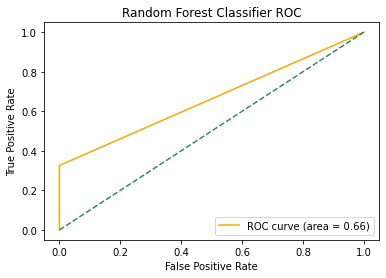

In [6]:
plt.plot(fprs[np.argmax(rfModelAccuracy)], tprs[np.argmax(rfModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % rfAucs[np.argmax(rfModelAccuracy)])
plt.plot([0, 1], [0,1], color='seagreen',linestyle='--')
plt.title('Random Forest Classifier ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Decision Tree Model

In [7]:
splitters = ['best','random']
dtModelAccuracy = list()
dtAucs = list()
dtModelParameters = list()
dtF1Scores = list()
fprs = list()
tprs = list()
for estimator in n_estimators:
    for split in splitters:
        for depth in max_depth:
            for crits in criterions:
                model = DecisionTreeClassifier(splitter = split, criterion = crits, max_depth = depth)
                model.fit(x_train,y_train)
                yHat = model.predict(x_test)
                dtModelAccuracy.append(accuracy_score(y_test,yHat))
                fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
                dtAucs.append(auc(fpr, tpr))
                tprs.append(tpr)
                fprs.append(fpr)
                dtF1Scores.append(f1_score(y_test,yHat))
                params = {'splitter':split,'criterion':crits,'max_depth':depth}
                dtModelParameters.append(params)

In [8]:
results = sorted(list(zip(dtModelParameters,dtModelAccuracy,dtAucs,dtF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['splitter', 'criterion','max_depth']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results = results.rename(columns = {'splitter':'Splitter','criterion':'Criterion','max_depth':'Max_depth'})
results.head()

,Splitter,Criterion,Max_depth,Accuracy,AUC,F1-Score
0,best,gini,5,0.828729,0.684541,0.537313
1,best,gini,5,0.828729,0.684541,0.537313
2,best,gini,5,0.828729,0.684541,0.537313
3,best,gini,5,0.828729,0.684541,0.537313
4,best,gini,5,0.828729,0.684541,0.537313


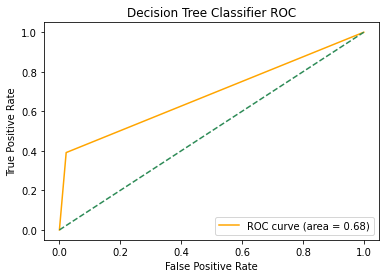

In [9]:
plt.plot(fprs[np.argmax(dtModelAccuracy)], tprs[np.argmax(dtModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % dtAucs[np.argmax(dtModelAccuracy)])
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('Decision Tree Classifier ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Logistic Regression

In [10]:
penalties = ['l1','l2','elasticnet',None]
cValues = [i / 10 for i in range(1,11)]
lRModelAccuracy = list()
lRAucs = list()
lRModelParameters = list()
lRF1Scores = list()
fprs = list()
tprs = list()
for pen in penalties:
    for value in cValues:
        if pen == 'elasticnet':
            model = LogisticRegression(penalty = pen, C = value,solver = 'saga',l1_ratio = 1,max_iter = 10000)
        elif pen == None:
            model = LogisticRegression(penalty = None, max_iter = 10000,solver = 'saga')
        else:
            model = LogisticRegression(penalty = pen, C = value,solver = 'saga',max_iter = 10000)
        model.fit(x_train,y_train)
        yHat = model.predict(x_test)
        lRModelAccuracy.append(accuracy_score(y_test,yHat))
        fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
        lRAucs.append(auc(fpr, tpr))
        tprs.append(tpr)
        fprs.append(fpr)
        lRF1Scores.append(f1_score(y_test,yHat))
        params = {'Penalty':pen,'C':value}
        lRModelParameters.append(params)

In [11]:
results = sorted(list(zip(lRModelParameters,lRModelAccuracy,lRAucs,lRF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['Penalty', 'C']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results.head()

,Penalty,C,Accuracy,AUC,F1-Score
0,l1,0.1,0.773481,0.554348,0.196078
1,l1,0.2,0.773481,0.554348,0.196078
2,l1,0.3,0.773481,0.554348,0.196078
3,l1,0.4,0.773481,0.554348,0.196078
4,l1,0.5,0.773481,0.554348,0.196078


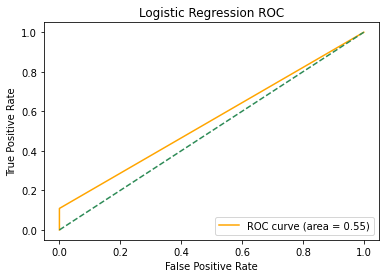

In [12]:
plt.plot(fprs[np.argmax(lRModelAccuracy)], tprs[np.argmax(lRModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % lRAucs[np.argmax(lRModelAccuracy)])
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('Logistic Regression ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# K-Nearest Neighbors

In [26]:
n_neighbors = [i for i in range(2,31)]
algorithms = ['auto','ball_tree','kd_tree','brute']
knnModelAccuracy = list()
knnAucs = list()
knnModelParameters = list()
knnF1Scores = list()
fprs = list()
tprs = list()
for n in n_neighbors:
    for algo in algorithms:
        model = KNeighborsClassifier(n_neighbors = n, algorithm = algo)
        model.fit(x_train,y_train)
        yHat = model.predict(x_test)
        knnModelAccuracy.append(accuracy_score(y_test,yHat))
        fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
        knnAucs.append(auc(fpr, tpr))
        tprs.append(tpr)
        fprs.append(fpr)
        knnF1Scores.append(f1_score(y_test,yHat))
        params = {'N_neighbors':n,'Algorithm':algo}
        knnModelParameters.append(params)

In [27]:
results = sorted(list(zip(knnModelParameters,knnModelAccuracy,knnAucs,knnF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['N_neighbors','Algorithm']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results.head()

,N_neighbors,Algorithm,Accuracy,AUC,F1-Score
0,5,auto,0.795580,0.626490,0.412698
1,5,ball_tree,0.795580,0.626490,0.412698
2,5,kd_tree,0.795580,0.626490,0.412698
3,5,brute,0.795580,0.626490,0.412698
4,4,auto,0.790055,0.594122,0.321429


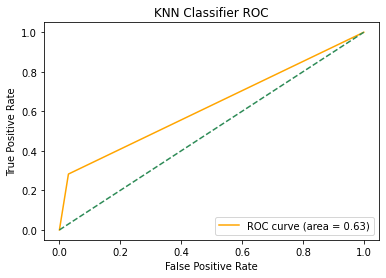

In [28]:
plt.plot(fprs[np.argmax(knnModelAccuracy)], tprs[np.argmax(knnModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % knnAucs[np.argmax(knnModelAccuracy)])
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('KNN Classifier ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

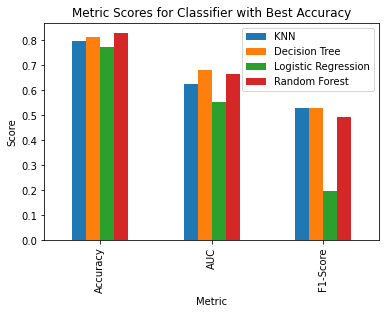

In [29]:
metrics = pd.DataFrame({'KNN':[knnModelAccuracy[np.argmax(knnModelAccuracy)],knnAucs[np.argmax(knnModelAccuracy)],dtF1Scores[np.argmax(dtModelAccuracy)]],
                       'Decision Tree': [dtModelAccuracy[np.argmax(dtModelAccuracy)],dtAucs[np.argmax(dtModelAccuracy)],dtF1Scores[np.argmax(dtModelAccuracy)]],
                       'Logistic Regression':[lRModelAccuracy[np.argmax(lRModelAccuracy)],lRAucs[np.argmax(lRModelAccuracy)],lRF1Scores[np.argmax(lRModelAccuracy)]],
                       'Random Forest':[rfModelAccuracy[np.argmax(rfModelAccuracy)],rfAucs[np.argmax(rfModelAccuracy)],rfF1Scores[np.argmax(rfModelAccuracy)]]},
                      index = ['Accuracy','AUC','F1-Score'])
metrics.plot(kind ='bar')
plt.title('Metric Scores for Classifier with Best Accuracy')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

Text(0.5, 1.0, 'Metric Scores for Classifier with Best Accuracy')

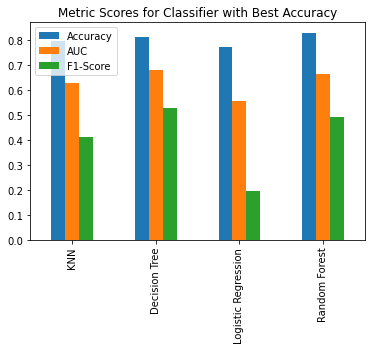

In [30]:
metrics = pd.DataFrame({'Accuracy':[knnModelAccuracy[np.argmax(knnModelAccuracy)],dtModelAccuracy[np.argmax(dtModelAccuracy)],lRModelAccuracy[np.argmax(lRModelAccuracy)],rfModelAccuracy[np.argmax(rfModelAccuracy)]],
                       'AUC': [knnAucs[np.argmax(knnModelAccuracy)],dtAucs[np.argmax(dtModelAccuracy)],lRAucs[np.argmax(lRModelAccuracy)],rfAucs[np.argmax(rfModelAccuracy)]],
                       'F1-Score':[knnF1Scores[np.argmax(knnModelAccuracy)],dtF1Scores[np.argmax(dtModelAccuracy)],lRF1Scores[np.argmax(lRModelAccuracy)],rfF1Scores[np.argmax(rfModelAccuracy)]]},
                      index = ['KNN','Decision Tree','Logistic Regression','Random Forest'])
metrics.plot(kind ='bar')
plt.title('Metric Scores for Classifier with Best Accuracy')

In [31]:
len(knnModelParameters)

116

In [33]:
df.shape

(904, 22)

# Normalizing Data

In [3]:
features = [column for column in df.columns if column != 'cardio' and column != 'occupation']
x = df[features]
y = df['cardio']
scaler = MinMaxScaler()
dataScaled = scaler.fit_transform(x)
dataScaled = pd.DataFrame(dataScaled,columns = features)
x_train, x_test, y_train, y_test = train_test_split(dataScaled,y,test_size = 0.2,random_state = 42)

# Random Forest Normalized

In [30]:
n_estimators = [i*10 for i in range(1,11)]
criterions = ['gini','entropy','log_loss']
max_depth = [i for i in range(2,6)]
rfModelAccuracy = list()
rfAucs = list()
rfModelParameters = list()
rfF1Scores = list()
fprs = list()
tprs = list()
for estimator in n_estimators:
    for crits in criterions:
        for depth in max_depth:
            model = RandomForestClassifier(n_estimators = estimator, criterion = crits, max_depth = depth)
            model.fit(x_train,y_train)
            yHat = model.predict(x_test)
            rfModelAccuracy.append(accuracy_score(y_test,yHat))
            fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
            rfAucs.append(auc(fpr, tpr))
            tprs.append(tpr)
            fprs.append(fpr)
            rfF1Scores.append(f1_score(y_test,yHat))
            params = {'n_estimator':estimator,'criterion':crits,'max_depth':depth}
            rfModelParameters.append(params)

In [31]:
results = sorted(list(zip(rfModelParameters,rfModelAccuracy,rfAucs,rfF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['n_estimator', 'criterion','max_depth']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results = results.rename(columns = {'n_estimator':'N_estimator','criterion':'Criterion','max_depth':'Max_depth'})
results.head()

,N_estimator,Criterion,Max_depth,Accuracy,AUC,F1-Score
0,50,gini,5,0.834254,0.673913,0.516129
1,60,gini,5,0.834254,0.673913,0.516129
2,80,log_loss,5,0.834254,0.673913,0.516129
3,80,gini,5,0.828729,0.663043,0.491803
4,30,entropy,5,0.823204,0.652174,0.466667


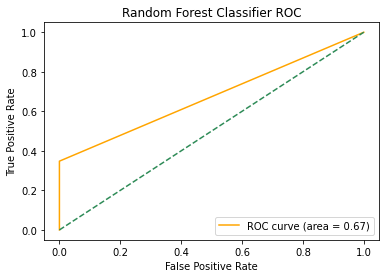

In [32]:
plt.plot(fprs[np.argmax(rfModelAccuracy)], tprs[np.argmax(rfModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % rfAucs[np.argmax(rfModelAccuracy)])
plt.plot([0, 1], [0,1], color='seagreen',linestyle='--')
plt.title('Random Forest Classifier ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# Logisitic Regression Normalized

In [59]:
penalties = ['l1','l2','elasticnet',None]
cValues = [i / 10 for i in range(1,11)]
lRModelAccuracy = list()
lRAucs = list()
lRModelParameters = list()
lRF1Scores = list()
fprs = list()
tprs = list()
for pen in penalties:
    for value in cValues:
        if pen == 'elasticnet':
            model = LogisticRegression(penalty = pen, C = value,solver = 'saga',l1_ratio = 1,max_iter = 10000)
        elif pen == None:
            model = LogisticRegression(penalty = None, max_iter = 10000,solver = 'saga')
        else:
            model = LogisticRegression(penalty = pen, C = value,solver = 'saga',max_iter = 10000)
        model.fit(x_train,y_train)
        yHat = model.predict(x_test)
        lRModelAccuracy.append(accuracy_score(y_test,yHat))
        fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
        lRAucs.append(auc(fpr, tpr))
        tprs.append(tpr)
        fprs.append(fpr)
        lRF1Scores.append(f1_score(y_test,yHat))
        params = {'Penalty':pen,'C':value}
        lRModelParameters.append(params)

In [60]:
results = sorted(list(zip(lRModelParameters,lRModelAccuracy,lRAucs,lRF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['Penalty', 'C']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results.head()

,Penalty,C,Accuracy,AUC,F1-Score
0,l1,0.4,0.823204,0.659340,0.483871
1,elasticnet,0.4,0.823204,0.659340,0.483871
2,l1,0.5,0.817680,0.648470,0.459016
3,l1,0.6,0.817680,0.648470,0.459016
4,l1,1.0,0.817680,0.655636,0.476190


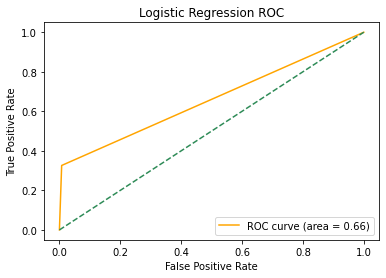

In [61]:
plt.plot(fprs[np.argmax(lRModelAccuracy)], tprs[np.argmax(lRModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % lRAucs[np.argmax(lRModelAccuracy)])
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('Logistic Regression ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# KNN Normalized

In [56]:
n_neighbors = [i for i in range(2,31)]
algorithms = ['auto','ball_tree','kd_tree','brute']
knnModelAccuracy = list()
knnAucs = list()
knnModelParameters = list()
knnF1Scores = list()
fprs = list()
tprs = list()
for n in n_neighbors:
    for algo in algorithms:
        model = KNeighborsClassifier(n_neighbors = n, algorithm = algo)
        model.fit(x_train,y_train)
        yHat = model.predict(x_test)
        knnModelAccuracy.append(accuracy_score(y_test,yHat))
        fpr, tpr, thresholds = roc_curve(y_test, yHat, pos_label=1)
        knnAucs.append(auc(fpr, tpr))
        tprs.append(tpr)
        fprs.append(fpr)
        knnF1Scores.append(f1_score(y_test,yHat))
        params = {'N_neighbors':n,'Algorithm':algo}
        knnModelParameters.append(params)

In [57]:
results = sorted(list(zip(knnModelParameters,knnModelAccuracy,knnAucs,knnF1Scores)),key = lambda x: x[1],reverse = True)
results = pd.DataFrame(results,columns = ['Parameters','Accuracy','AUC','F1-Score'])
temp = results['Parameters'].apply(lambda x: {} if pd.isna(x) else x).apply(pd.Series)[['N_neighbors','Algorithm']]
results = results.drop(columns = ['Parameters'])
results = pd.concat([temp,results],axis = 1)
results.head()

,N_neighbors,Algorithm,Accuracy,AUC,F1-Score
0,4,auto,0.80663,0.648229,0.461538
1,4,ball_tree,0.80663,0.648229,0.461538
2,4,kd_tree,0.80663,0.648229,0.461538
3,4,brute,0.80663,0.648229,0.461538
4,5,auto,0.79558,0.662319,0.493151


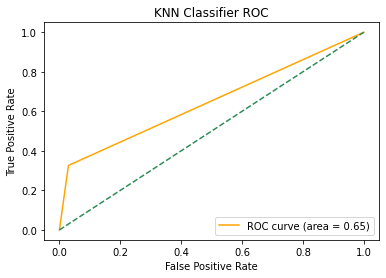

In [58]:
plt.plot(fprs[np.argmax(knnModelAccuracy)], tprs[np.argmax(knnModelAccuracy)], color='orange',label='ROC curve (area = %0.2f)' % knnAucs[np.argmax(knnModelAccuracy)])
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('KNN Classifier ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

# FCNN

In [4]:
import random
import torch
from torch import nn, optim
from sklearn.metrics import roc_auc_score
from torch.optim.lr_scheduler import StepLR

In [5]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [14]:
input_size = x_train.shape[1]
model = nn.Sequential(
    nn.Linear(input_size, 20),
    nn.ReLU(),
    nn.Linear(20,20),
    nn.Dropout(0.2),
    nn.Linear(20, 2)
)
loss_function = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
scheduler = StepLR(optimizer, step_size=200, gamma=0.2) 
for t in range(1000):
    y_pred = model(x_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()
with torch.no_grad():
    model.eval()
    y_pred_prob = nn.functional.softmax(model(x_test_tensor), dim=1)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob.numpy())

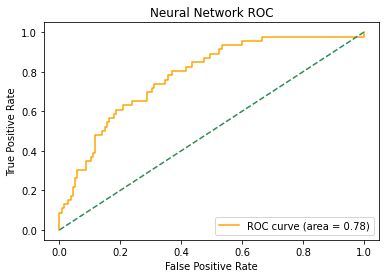

In [15]:
plt.plot(fpr, tpr, color='orange',label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='seagreen',linestyle='--')
plt.title('Neural Network ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()